# Populasjonsvekst -- skandinavia

In [1]:
import math
land = ["Norge", "Sverige", "Danmark"]
K = [20e6, 25e6, 15e6] #Makspopulasjon
r = [0.01, 0.02, 0.03] #relativ vekstrate
P0 = [4e6, 8e6, 6e6] # Startpopulasjon
t = 20 #Hvor mange år vekst


def logistisk_vekst(P0,K,r,t):
    A = (K-P0)/P0
    P = K/(1+A*math.exp(-r*t))
    return P
  
def lag_pop_funk(P0,K,r):
    def slutt_populasjon(t):
        P = logistisk_vekst(P0,K,r,t)
        return P
    return slutt_populasjon #Vi returnerer funksjonen vi laget inne i funksjonen!

def format_pop(P):
    return int(round(P,-3))

pop_funksjoner = [] #Liste med funksjoner som regner ut populasjon ved tiden t for land 0,1,2
pop_funksjoner.append( lag_pop_funk(P0[0], K[0], r[0]))
pop_funksjoner.append(lag_pop_funk(P0[1], K[1], r[1]))
pop_funksjoner.append(lag_pop_funk(P0[2], K[2], r[2]))
#Vi kunne også lagret disse funksjonene i en liste.. :)

#print(type(pop_norge))
P_slutt = []
P_slutt.append(pop_funksjoner[0](t))
P_slutt.append(pop_funksjoner[1](t))
P_slutt.append(pop_funksjoner[2](t))

print("Sluttpopulasjonen i", land[0], "er:", format_pop(P_slutt[0]))
print("Sluttpopulasjonen i", land[1], "er:", format_pop(P_slutt[1]))
print("Sluttpopulasjonen i", land[2], "er:", format_pop(P_slutt[2]))


Sluttpopulasjonen i Norge er: 4678000
Sluttpopulasjonen i Sverige er: 10312000
Sluttpopulasjonen i Danmark er: 8227000


### Populasjonsvekst med datastrukturer, funksjoner og løkker

Antall land 3


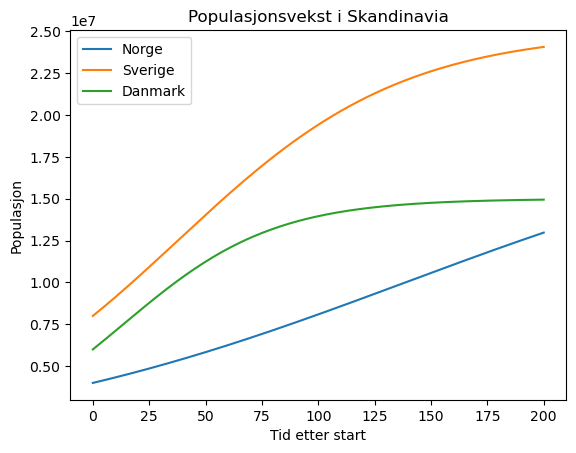

1
2
3
4
hei


In [15]:
import math
import matplotlib.pyplot as plt

land = ["Norge", "Sverige", "Danmark"]
K = [20e6, 25e6, 15e6] #Makspopulasjon
r = [0.01, 0.02, 0.03] #relativ vekstrate
P0 = [4e6, 8e6, 6e6] # Startpopulasjon
t = 200 #Hvor mange år vekst


def logistisk_vekst(P0,K,r,t):
    A = (K-P0)/P0
    P = K/(1+A*math.exp(-r*t))
    return P

populasjonsvekst_liste =  [] # Inneholde lister med populasjonsutvikling for landene
sluttpopulasjon =  []

n_land = len(land)
print("Antall land", n_land)
for i in range(n_land):
    
    slutt_pop = logistisk_vekst(P0[i], K[i], r[i], t) #Regn ut sluttpopulasjon
    sluttpopulasjon.append(slutt_pop) #Legg til sluttpopulasjon for land "i" i listen sluttpopulasjon
    pop_vekst = [] #Lag en tom liste som skal innholde vekst til land "i"
    
    for ti in range(1,t+1): #Iterer over alle år fra 1 til sluttår
        populasjon = logistisk_vekst(P0[i], K[i], r[i], ti) #Regn ut populasjon i år ti
        pop_vekst.append(populasjon) #Legg til i vekstlisten
    pop_vekst.insert(0, P0[i])
    populasjonsvekst_liste.append(pop_vekst) #Legg vekstlisten i listen over populasjonsvekster

t_liste = list(range(t+1))
for i in range(n_land):
    plt.plot(t_liste, populasjonsvekst_liste[i], label=land[i])
plt.title("Populasjonsvekst i Skandinavia")
plt.xlabel("Tid etter start")
plt.ylabel("Populasjon")
plt.legend()
plt.show()



In [11]:
liste = [1,23]
help(liste.insert)

Help on built-in function insert:

insert(index, object, /) method of builtins.list instance
    Insert object before index.



# Oppg.
* I eksempelet over er dataene spredt utover flere variabler
* Ofte er det bedre å «pakke» den litt mer sammen
* Prøv å regne ut og plotte populasjonsveksten slik som over, men pakk sammen dataen først:

- Lag en variabler `data` som er en liste av lister som ser omtrent slik ut:
```python
[
    ['Norge', 4000000.0, 20000000.0, 0.01], 
    ['Sverige', 8000000.0, 25000000.0, 0.02], 
    ['Danmark', 6000000.0, 15000000.0, 0.03]
]
```
- Bruk en `for` løkke til å sette dette sammen (Skriv ikke inn for hånd)
  

Norge Har startpopulasjon 4000000.0
Sverige Har startpopulasjon 8000000.0
Danmark Har startpopulasjon 6000000.0


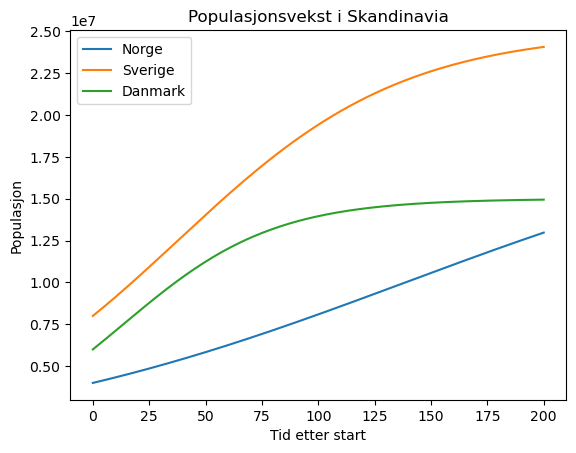

In [32]:
land = ["Norge", "Sverige", "Danmark"]
K = [20e6, 25e6, 15e6] #Makspopulasjon
r = [0.01, 0.02, 0.03] #relativ vekstrate
P0 = [4e6, 8e6, 6e6] # Startpopulasjon
t = 200 #Hvor mange år vekst
t_liste = list(range(0,t+1))

data = []
n_indeks = len(land)
for i in range(n_indeks):
    datapunkt = [land[i],P0[i], K[i], r[i]]
    #print(datapunkt)
    data.append(datapunkt)

for datapunkt in data:
    print(datapunkt[0], "Har startpopulasjon", datapunkt[1])
    pop_vekst = []
    for t_i in t_liste:
        populasjon = logistisk_vekst(datapunkt[1], datapunkt[2], datapunkt[3], t_i)
        pop_vekst.append(populasjon)
    datapunkt.append(pop_vekst)

for d in data:
    plt.plot(t_liste, d[-1], label=d[0])
plt.title("Populasjonsvekst i Skandinavia")
plt.xlabel("Tid etter start")
plt.ylabel("Populasjon")
plt.legend()
plt.show()



# Kontrollflyt: (Boolsk aritmetikk og if-else)
![hei](https://www.c-sharpcorner.com/UploadFile/BlogImages/06212022091850AM/COntrol.png)

# Kontrollflyt
* Vi trenger en måte å kontrolle hva av koden vår som blir kjørt i ulike situasjoner
* Vi trenger kanskje å kjøre forskjellig kode om det oppstår en feil i koden vår
* Vi trenger at koden vår gjør valg og kjører forskjellig kode ved forskjellig data
* I Python kan vi bruke `if` `else` og `elif`

In [6]:
def er_myndig(alder):
    # Funksjonen skal printe ut "Du er myndig"
    # dersom alder >= 18 og "Du er ikke myndig ellers"
    
alder = int(input("Hva er din alder?"))
er_myndig(alder)


Hva er din alder? 25


Du er myndig


```python
if «boolsk verdi eller uttrykk»:
    #Blokk med kode dersom True
else:
    #Blokk med kode dersom False
```
* Boolsk verdier er en datatype som har verdien `True` eller `False`
* Et boolsk uttrykk får en av disse verdiene når vi evaluerer de
* Boolske uttrykk er bygd av boolske "operatorer"

# Boolske operatorer
| Operator | Beskrivelse                                   | Eksempel               | Resultat    |
|----------|----------------------------------------------|------------------------|-------------|
| `and`    | Returnerer `True` hvis begge påstandene er sanne | `True and False`    | `False`     |
| `or`     | Returnerer `True` hvis én av påstandene er sann | `True or False`     | `True`      |
| `not`    | Reverserer den boolske verdien                | `not True`             | `False`     |
| `==`     | Sjekker om to verdier er like                 | `5 == 5`               | `True`      |
| `!=`     | Sjekker om to verdier ikke er like            | `5 != 3`               | `True`      |
| `>`      | Sjekker om venstre verdi er større enn høyre  | `5 > 3`                | `True`      |
| `<`      | Sjekker om venstre verdi er mindre enn høyre  | `5 < 3`                | `False`     |
| `>=`     | Sjekker om venstre verdi er større enn eller lik høyre | `5 >= 5` | `True`      |
| `<=`     | Sjekker om venstre verdi er mindre enn eller lik høyre  | `3 <= 5` | `True`      |


# Eksempler:

In [1]:
# ==

In [2]:
# !=

In [3]:
# and

In [4]:
# or

In [5]:
# not -- != False

* Vi må ikke bruke `else` blokken


In [6]:
# >= (uten else)

* `elif` lar oss gjøre en ny sjekk i stedet for `else`

In [7]:
#elif

# Løkker: While
* While løkken lar oss loope/iterere så lenge et boolsk uttrykk er «True»
```python
while «boolsk uttrykk»:
    #Løkke
    #Løkke
#løkke ferdig
```

In [9]:
# Annuitetslån: Lag nedbetalingsplan (plot)
import matplotlib.pyplot as plt

laan = 100000
rentesats = 0.05
terminbelop = float(input("Hva er ønsket terminbelop?"))
renter = laan*rentesats/12
max_nedbetalingstid = 10


Hva er ønsket terminbelop? 55
